In [110]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score


df_term_freq=pd.read_csv("/home/slisowski/Pobrane/term_freq.csv", index_col=0)
df=pd.read_csv("/home/slisowski/Pobrane/clean_stock_sentiment_data_upsampled.csv", index_col=0)
most_freq_words=list(df_term_freq.sort_values(by='total', ascending=False).index[:10])

In [84]:
most_freq_words+['aa']

['the', 'to', 'in', 'of', 'and', 'for', 'on', 'is', 'eur', 'from', 'aa']

In [85]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression


X=df.text
y=df.sentiment
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

vectorizer = CountVectorizer(ngram_range=(1,2), stop_words=most_freq_words+['aa'])

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec = vectorizer.transform(x_train)
x_test_vec = vectorizer.transform(x_test)


In [112]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.linear_model import LogisticRegression


X=df.text
y=df.sentiment
x_train, x_test, y_train, y_test= train_test_split(X,y, test_size=0.3, random_state=42)

vectorizer_tf = TfidfVectorizer(ngram_range=(1,2), stop_words=most_freq_words+['aa'])

# learn a vocabulary dictionary of all tokens in the raw documents
vectorizer_tf.fit(list(x_train) + list(x_test))

# transform documents to document-term matrix
x_train_vec_tf = vectorizer_tf.transform(x_train)
x_test_vec_tf = vectorizer_tf.transform(x_test)


In [113]:
vectorizer.vocabulary_['latest']

38711

In [87]:
from joblib import dump, load
dump(vectorizer, '/home/slisowski/tweets_news_sentiment/vectorizer.joblib')

['/home/slisowski/tweets_news_sentiment/vectorizer.joblib']

In [88]:
x_train.isna().sum()

0

In [89]:
y_train.isna().sum()

0

In [90]:

log_reg=LogisticRegression().fit(x_train_vec,y_train)
log_reg.score(x_train_vec,y_train)
y_predicted=log_reg.predict(x_test_vec)
acc=accuracy_score(y_test, y_predicted)
f1=f1_score(y_test, y_predicted)
psc=precision_score(y_test, y_predicted)
rsc=recall_score(y_test, y_predicted)


In [116]:
log_reg_tf=LogisticRegression().fit(x_train_vec_tf,y_train)
log_reg_tf.score(x_train_vec_tf,y_train)
y_predicted=log_reg_tf.predict(x_test_vec_tf)
acc_tf=accuracy_score(y_test, y_predicted)
f1_tf=f1_score(y_test, y_predicted)
psc_tf=precision_score(y_test, y_predicted)
rsc_tf=recall_score(y_test, y_predicted)

In [117]:
accuracy_score(y_train, log_reg_tf.predict(x_train_vec))

0.8813037341203644

In [118]:
acc_tf

0.8491469619874289

In [119]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_predicted)

array([[1363,  291],
       [ 213, 1474]])

In [120]:
f1

0.8539976825028968

In [121]:
psc

0.8351274787535411

In [122]:
rsc

0.8737403675163011

In [105]:
from joblib import dump, load
dump(log_reg, '/home/slisowski/tweets_news_sentiment/log_reg_final.joblib')

['/home/slisowski/tweets_news_sentiment/log_reg_final.joblib']

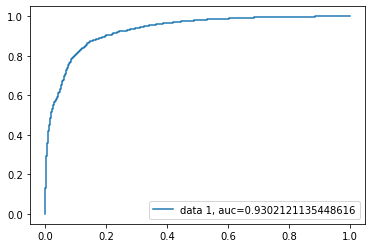

In [99]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba = log_reg.predict_proba(x_test_vec)[:,1]
fpr, tpr, proba = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

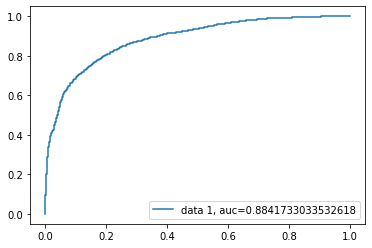

In [131]:
from sklearn import metrics
import matplotlib.pyplot as plt
y_pred_proba_tf = log_reg_tf.predict_proba(x_test_vec)[:,1]
fpr_tf, tpr_tf, proba_tf = metrics.roc_curve(y_test,  y_pred_proba_tf)
auc_tf = metrics.roc_auc_score(y_test, y_pred_proba_tf)
plt.plot(fpr_tf,tpr_tf,label="data 1, auc="+str(auc_tf))
plt.legend(loc=4)
plt.show()

In [107]:
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]

In [128]:
optimal_proba_cutoff_tf = sorted(list(zip(np.abs(tpr_tf - fpr_tf), proba_tf)), key=lambda i: i[0], reverse=True)[0][1]

In [130]:
optimal_proba_cutoff_tf

0.21167925679600877